## Neural Network and Deep Learning

### activation function
* sigmoid, 
* hyperbolic tanh, 
* rectified linear unit (ReLU) : can avoid the 'vanishing gradient problem'

### Softmax
### Forward propagation
* 첫번째층과 두번째층의 가중치와 입력사이의 내적을 구하고 그 결과를 활성화 함수로 변환
* 마지막층까지 동일한 반복
* 마지막으로 이 벡터에 활성화함수를 곱해서 예측값 획득

In [15]:
import numpy as np
import math
b1 = 0 # bias on 1
b2 = 0 # bias on 2

def sigmoid(x):
    return 1/(1+(math.e**-x))

def softmax(x):
    l_exp = np.exp(x)
    sm = l_exp/np.sum(l_exp, axis=0)
    return sm

# Three features on input dataset
X = np.array([[.35, .21, .33],\
              [.2, .4, .3], \
              [.18, .21, .16]])
len_X = len(X)
input_dim = 3
output_dim = 1
hidden_units=4

np.random.seed(22)

#gain vector
theta0 = 2*np.random.random((input_dim, hidden_units))
theta1 = 2*np.random.random((hidden_units, output_dim))

#forward propagation
d1 = X.dot(theta0) + b1
l1 = sigmoid(d1)
l2 = l1.dot(theta1) + b2

#output
output = softmax(l2)

In [18]:
print(X)
print(theta0)
print(theta1)
print(d1)
print(l1)
print(l2)
print(output)

[[ 0.35  0.21  0.33]
 [ 0.2   0.4   0.3 ]
 [ 0.18  0.21  0.16]]
[[ 0.41692107  0.96336212  0.84107607  1.718364  ]
 [ 0.34232311  0.67772792  0.54106567  1.3820827 ]
 [ 0.44080903  1.62390184  0.02105375  1.12240739]]
[[ 1.62745237]
 [ 1.49020059]
 [ 0.37822271]
 [ 0.01228173]]
[[ 0.36327721  1.01538721  0.41494815  1.26205921]
 [ 0.35255617  0.95093415  0.39095761  1.2332281 ]
 [ 0.21746309  0.57555234  0.26838608  0.77912807]]
[[ 0.58983352  0.73407311  0.60227376  0.77938038]
 [ 0.58723731  0.721303    0.5965132   0.77438307]
 [ 0.55415253  0.64004336  0.56669665  0.68549216]]
[[ 2.29120791]
 [ 2.26571252]
 [ 2.07840642]]
[[ 0.35930595]
 [ 0.35026109]
 [ 0.29043296]]


### backpropagration and error

In [28]:
import numpy as np
import math
def sigmoid(x):
    return 1/(1+(math.e**2-x))
def deriv_sigmoid(y): #derivation of the sigmoid
    return y*(1.0-y)

alpha=.1 # learning rate
X = np.array([[.35, .21, .33],\
              [.2, .4, .3], \
              [.18, .21, .16]])
y = np.array([[0],[1],[1],[0]])

np.random.seed(1)

#layer initialization
theta0 = 2*np.random.random((3,4)) - 1
theta1 = 2*np.random.random((4,1)) - 1

print(theta0)
print(theta1)

for iter in range(205000): 
    #feedforward
    input_layer = X
    layer1 = sigmoid(np.dot(input_layer, theta0))
    layer2 = sigmoid(np.dot(layer1,theta1))
    
    print(y)
    print(layer1)
    print(layer2)
    
    # difference
    layer2_error = y - layer2
    if(iter % 10000) == 0:
        print('Neuralnet accuracy:' + str(np.mean(1-(np.abs(layer2_error)))))
    
    #gradient 
    layer2_delta = alpha*(layer2_error*deriv_sigmoid(layer2))
    layer1_error = layer2_delta.dot(theta1.T)
    layer1_delta = alpha*(layer1_error * deriv_sigmoid(layer1))
    
    theta1 += layer1.T.dot(layer2_delta)
    theta0 += input_layer.T.dot(layer1_delta)

[[-0.16595599  0.44064899 -0.99977125 -0.39533485]
 [-0.70648822 -0.81532281 -0.62747958 -0.30887855]
 [-0.20646505  0.07763347 -0.16161097  0.370439  ]]
[[-0.5910955 ]
 [ 0.75623487]
 [-0.94522481]
 [ 0.34093502]]
[[0]
 [1]
 [1]
 [0]]
[[ 0.11542497  0.11932565  0.11205639  0.11806316]
 [ 0.11406694  0.11622818  0.11250511  0.11791698]
 [ 0.11627467  0.11808417  0.1145916   0.11812218]]
[[ 0.11858582]
 [ 0.11855751]
 [ 0.11853216]]


ValueError: operands could not be broadcast together with shapes (4,1) (3,1) 

In [30]:
import numpy as np
import math
def sigmoid(x):      # sigmoid function
	return 1 /(1+(math.e**-x))

def deriv_sigmoid(y): #the derivative of the sigmoid function
    return y * (1.0 - y)   
    
alpha=.1    #this is the learning rate
X = np.array([  [.35,.21,.33],
            	[.2,.4,.3],
            	[.4,.34,.5],
            	[.18,.21,16] ])                
y = np.array([[0],
		[1],
		[1],
		[0]])
np.random.seed(1)
#We randomly initialize the layers
theta0 = 2*np.random.random((3,4)) - 1
theta1 = 2*np.random.random((4,1)) - 1

print(theta0)
print(theta1)

for iter in range(205000): #here we specify the amount of training rounds.
	# Feedforward the input like we did in the previous exercise
    input_layer = X
    l1 = sigmoid(np.dot(input_layer,theta0))
    l2 = sigmoid(np.dot(l1,theta1))

    # Calculate error 
    l2_error = y - l2
    
    if (iter% 1000) == 0:
        print("Neuralnet accuracy:" + str(np.mean(1-(np.abs(l2_error)))))
        
    # Calculate the gradients in vectorized form 
    # Softmax and bias units are left out for instructional simplicity
    l2_delta = alpha*(l2_error*deriv_sigmoid(l2))
    l1_error = l2_delta.dot(theta1.T)
    l1_delta = alpha*(l1_error * deriv_sigmoid(l1))

    theta1 += l1.T.dot(l2_delta)
    theta0 += input_layer.T.dot(l1_delta)

[[-0.16595599  0.44064899 -0.99977125 -0.39533485]
 [-0.70648822 -0.81532281 -0.62747958 -0.30887855]
 [-0.20646505  0.07763347 -0.16161097  0.370439  ]]
[[-0.5910955 ]
 [ 0.75623487]
 [-0.94522481]
 [ 0.34093502]]
Neuralnet accuracy:0.446475342875
Neuralnet accuracy:0.625318046022
Neuralnet accuracy:0.639273569828
Neuralnet accuracy:0.646973337655
Neuralnet accuracy:0.65355100446
Neuralnet accuracy:0.660011060327
Neuralnet accuracy:0.666798132376
Neuralnet accuracy:0.674498860374
Neuralnet accuracy:0.684028475313
Neuralnet accuracy:0.696299738928
Neuralnet accuracy:0.711746799387
Neuralnet accuracy:0.730046564033
Neuralnet accuracy:0.750090593059
Neuralnet accuracy:0.770419774119
Neuralnet accuracy:0.789971860781
Neuralnet accuracy:0.808263092189
Neuralnet accuracy:0.824566058728
Neuralnet accuracy:0.838737531167
Neuralnet accuracy:0.851026112067
Neuralnet accuracy:0.861691314965
Neuralnet accuracy:0.870967069843
Neuralnet accuracy:0.87906528131
Neuralnet accuracy:0.886172293348
Neura

In [51]:
import neurolab as nl
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#training set
x = np.linspace(-10,10,60)
y = np.cos(x) * 0.9
size = len(x)
x_train = x.reshape(size,1)
y_train = y.reshape(size,1)

# 4 layers network
d=[[1,1],[45,1],[45,45,1],[45,45,45,1]]
for i in range(4):
    net = nl.net.newff([[-10,10]],d[i])
    train_net=nl.train.train_gd(net, x_train, y_train, epochs=1000, show=100)
    out=net.sim(x_train)
    
    import matplotlib.pyplot
    plt.plot(train_net)
    plt.xlabel('Epochs')
    plt.ylabel('squared error')
    x2 = np.linspace(-10,0,10.0,150)
    y2 = net.sim(x2.reshape(x2.size,1)).reshape(x2,size)
    y3 = output.reshape(size)
    plt.subplot(2,1,2)
    plt.suptitle([i,'hidden layers'])
    plt.plot(x2,y2,'-',x,y,'.',x,y3,'p')
    plt.legend(['y predicted', 'y_target'])
    plt.show()

Epoch: 100; Error: 12.647981800494856;
Epoch: 200; Error: 12.647981800494856;
Epoch: 300; Error: 12.647981800494856;
Epoch: 400; Error: 12.647981800494856;
Epoch: 500; Error: 12.647981800494856;
Epoch: 600; Error: 12.647981800494856;
Epoch: 700; Error: 12.647981800494856;
Epoch: 800; Error: 12.647981800494856;
Epoch: 900; Error: 12.647981800494856;
Epoch: 1000; Error: 12.647981800494856;
The maximum number of train epochs is reached


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:25: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


TypeError: only integer scalar arrays can be converted to a scalar index

In [42]:
print(size)
print(x)
print(x_train)

60
[-10.          -9.66101695  -9.3220339   -8.98305085  -8.6440678
  -8.30508475  -7.96610169  -7.62711864  -7.28813559  -6.94915254
  -6.61016949  -6.27118644  -5.93220339  -5.59322034  -5.25423729
  -4.91525424  -4.57627119  -4.23728814  -3.89830508  -3.55932203
  -3.22033898  -2.88135593  -2.54237288  -2.20338983  -1.86440678
  -1.52542373  -1.18644068  -0.84745763  -0.50847458  -0.16949153
   0.16949153   0.50847458   0.84745763   1.18644068   1.52542373
   1.86440678   2.20338983   2.54237288   2.88135593   3.22033898
   3.55932203   3.89830508   4.23728814   4.57627119   4.91525424
   5.25423729   5.59322034   5.93220339   6.27118644   6.61016949
   6.94915254   7.28813559   7.62711864   7.96610169   8.30508475
   8.6440678    8.98305085   9.3220339    9.66101695  10.        ]
[[-10.        ]
 [ -9.66101695]
 [ -9.3220339 ]
 [ -8.98305085]
 [ -8.6440678 ]
 [ -8.30508475]
 [ -7.96610169]
 [ -7.62711864]
 [ -7.28813559]
 [ -6.94915254]
 [ -6.61016949]
 [ -6.27118644]
 [ -5.9322033

Epoch: 100; Error: 12.647981800494854;
Epoch: 200; Error: 12.647981800494856;
Epoch: 300; Error: 12.647981800494856;
Epoch: 400; Error: 12.647981800494854;
Epoch: 500; Error: 12.647981800494856;
Epoch: 600; Error: 12.647981800494856;
Epoch: 700; Error: 12.647981800494854;
Epoch: 800; Error: 12.647981800494856;
Epoch: 900; Error: 12.647981800494856;
Epoch: 1000; Error: 12.647981800494854;
The maximum number of train epochs is reached


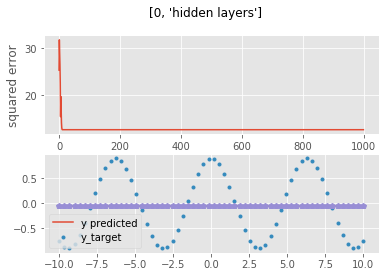

Epoch: 100; Error: 0.962105879669326;
Epoch: 200; Error: 2.2173259115501858;
Epoch: 300; Error: 2.7378201186658746;
Epoch: 400; Error: 3.648756505028984;
Epoch: 500; Error: 2.4107842941004876;
Epoch: 600; Error: 2.367742838621725;
Epoch: 700; Error: 2.669213781834456;
Epoch: 800; Error: 1.640055779192841;
Epoch: 900; Error: 2.0838096675855553;
Epoch: 1000; Error: 1.9446943530942267;
The maximum number of train epochs is reached


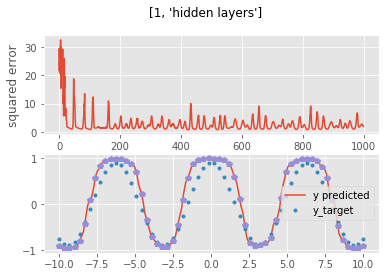

Epoch: 100; Error: 1.1569560286380507;
Epoch: 200; Error: 4.307382467158424;
Epoch: 300; Error: 3.2396976877484756;
Epoch: 400; Error: 1.8250274474488524;
Epoch: 500; Error: 0.7060890174037016;
Epoch: 600; Error: 0.5211583056017691;
Epoch: 700; Error: 0.3788344850915756;
Epoch: 800; Error: 0.33833931665208133;
Epoch: 900; Error: 0.3072190330788462;
Epoch: 1000; Error: 0.17462380501625752;
The maximum number of train epochs is reached


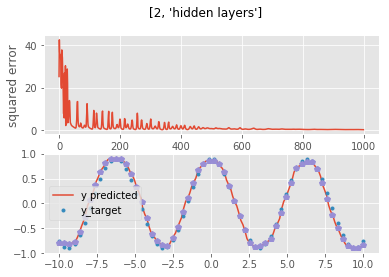

Epoch: 100; Error: 0.6410010838028554;
Epoch: 200; Error: 1.9225355188765112;
Epoch: 300; Error: 1.3000509895754697;
Epoch: 400; Error: 0.2592750968036717;
Epoch: 500; Error: 0.18676960209550503;
Epoch: 600; Error: 0.21210042425642994;
Epoch: 700; Error: 0.07181848523480955;
Epoch: 800; Error: 0.09554655780636803;
Epoch: 900; Error: 0.032587541894746413;
Epoch: 1000; Error: 0.049542572025484705;
The maximum number of train epochs is reached


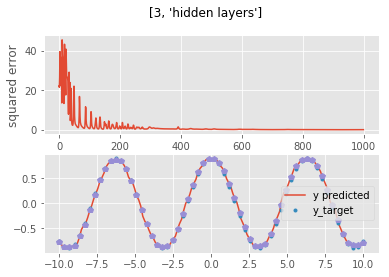

In [52]:
import neurolab as nl
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
# Create train samples
x = np.linspace(-10,10, 60)
y = np.cos(x) * 0.9
size = len(x)
x_train = x.reshape(size,1)
y_train = y.reshape(size,1)

# Create network with 4 layers and random initialized
# just experiment with the amount of layers

d=[[1,1],[45,1],[45,45,1],[45,45,45,1]]
for i in range(4):
    net = nl.net.newff([[-10, 10]],d[i])
    train_net=nl.train.train_gd(net, x_train, y_train, epochs=1000, show=100)
    outp=net.sim(x_train)
# Plot results (dual plot with error curve and predicted values)
    import matplotlib.pyplot 
    plt.subplot(2, 1, 1)
    plt.plot(train_net)
    plt.xlabel('Epochs')
    plt.ylabel('squared error')
    x2 = np.linspace(-10.0,10.0,150)
    y2 = net.sim(x2.reshape(x2.size,1)).reshape(x2.size)
    y3 = outp.reshape(size)
    plt.subplot(2, 1, 2)

    plt.suptitle([i ,'hidden layers'])
    plt.plot(x2, y2, '-',x , y, '.', x, y3, 'p')
    plt.legend(['y predicted', 'y_target'])
    plt.show()